In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# **Haberman's Survival Data Set**

Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

## **About the Dataset**

Title: Haberman's Survival Data

Attribute Information:

Age of patient at time of operation (numerical)

Patient's year of operation (year - 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute) 
    1 = the patient survived 5 years or longer 
    2 = the patient died within 5 year

Missing Attribute Values: None

Data may be found in :
                                    http://mlr.cs.umass.edu/ml/machine-learning-databases/haberman/haberman.data
                                                                            or
                                    https://www.kaggle.com/gilsousa/habermans-survival-data-set

# **1 Loading the data from the Haberman.csv file**

In [2]:
dataset = pd.read_csv("haberman.csv")

# **2 Data preparation**

**Printing the shape of the dataset**

In [3]:
dataset.shape

(306, 4)

**Printing the column names of the dataset **

In [4]:
dataset.columns = ['Age', 'Year operation', 'Axillary nodes detected', 'Survival status']

In [5]:
dataset.columns

Index(['Age', 'Year operation', 'Axillary nodes detected', 'Survival status'], dtype='object')

**Printing the top 10 rows of the dataset**

In [6]:
dataset.head(10)

,Age,Year operation,Axillary nodes detected,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


### **Describing the dataset in terms of count, mean, standard deviation min value,max value, 25% value, 50% value, 75% value for each feature(column) of the dataset **

In [7]:
dataset.describe()

,Age,Year operation,Axillary nodes detected,Survival status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [8]:
dataset['Survival status'].value_counts()

1    225
2     81
Name: Survival status, dtype: int64

## **Observations:**
* Number of Instances: 306
* Number of Attributes: 4 (including the class attribute)
* The year operation gives the last two digits of the year for each patient.
* The dataset is classified into two classes (Survived-1 and not survived-2).
* 225 patients of class 1, the patient survived 5 years or longer ,
* 81 patients of class 2, the patient died within 5 year.

# **3 Data Exploration** 

Data exploration is concerned with building a deeper understanding of your data. You try to understand how variables interact with each other, the distribution of the data, and whether there are outliers. To achieve this you mainly use descriptive statistics, visual techniques, plots and simple modeling.

In [9]:
import seaborn as sns
import matplotlib.pyplot as pl

# **Univariate Analysis**

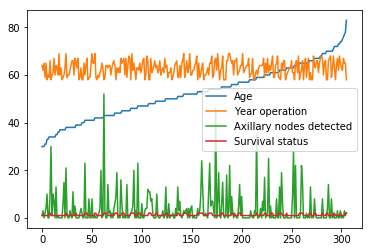

In [10]:
dataset.plot()
pl.show()

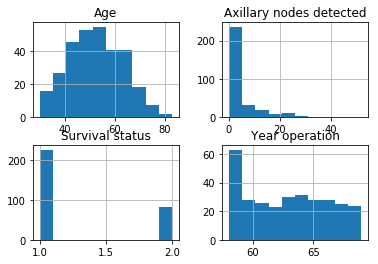

In [11]:
dataset.hist()
pl.show()

# **Bivariate Analysis**

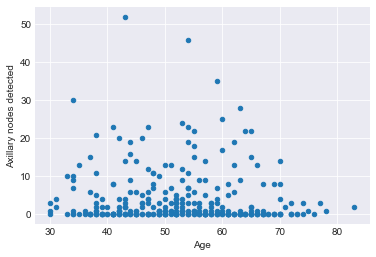

In [12]:
sns.set_style("darkgrid")
dataset.plot(kind="scatter", x="Age", y="Axillary nodes detected")
pl.show()

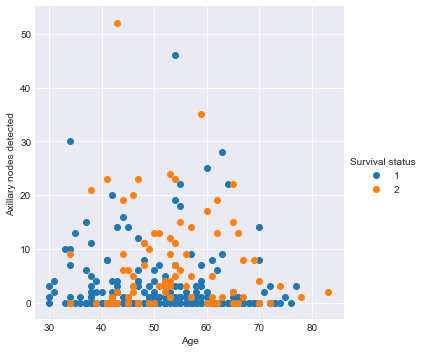

In [13]:
sns.FacetGrid(dataset, hue="Survival status", size=5)\
.map(pl.scatter, "Age", "Axillary nodes detected").add_legend()
pl.show()

## **Pair-Plots**

pair polts help us to know the corelations between the attributes among the data.

C:\Users\Murali\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Murali\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Murali\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Murali\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Murali\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


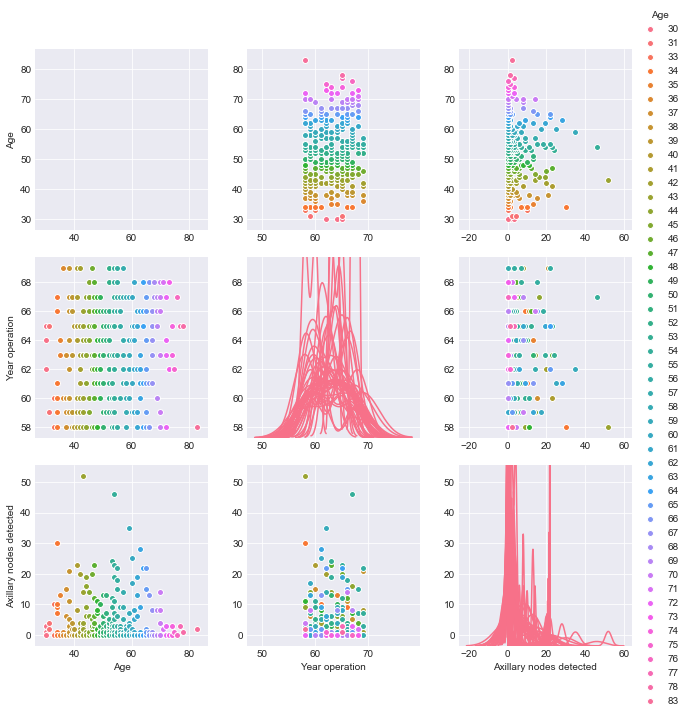

In [14]:
#plotting the dataset with 'Age' attribute
sns.pairplot(dataset, hue="Age", size=3, diag_kind="kde",\
             vars=['Age','Year operation','Axillary nodes detected'])
pl.show()

C:\Users\Murali\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Murali\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


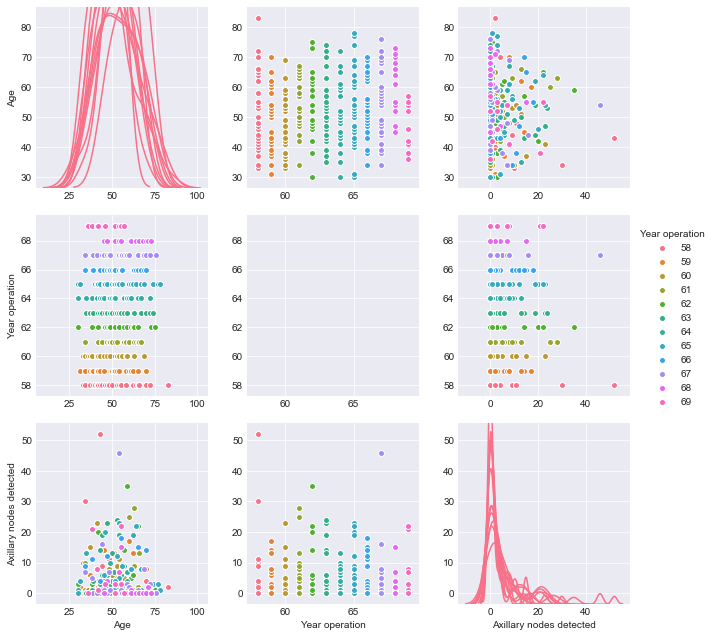

In [15]:
#plotting the dataset with 'Year operation' attribute
sns.pairplot(dataset, hue="Year operation", size=3, diag_kind="kde",\
             vars=['Age','Year operation','Axillary nodes detected'])
pl.show()

C:\Users\Murali\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Murali\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Murali\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\Murali\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Murali\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


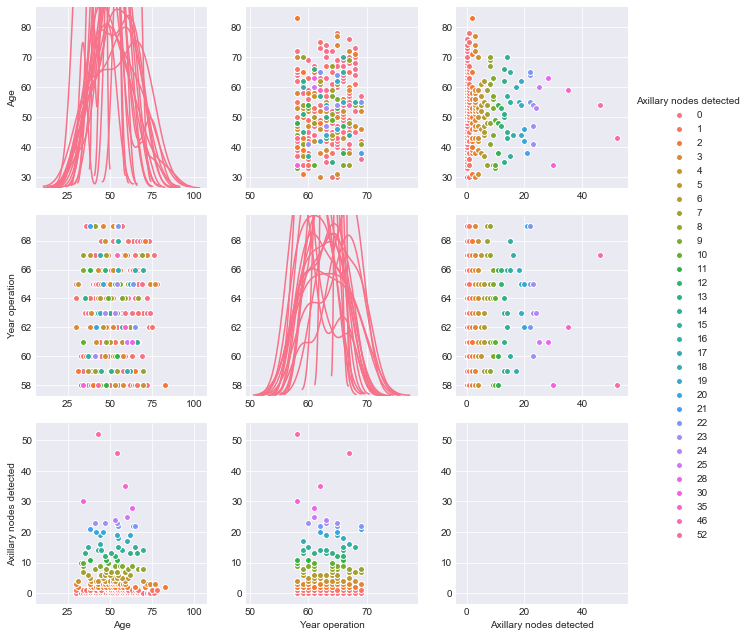

In [16]:
#plotting the dataset with Axillary node detected attribute
sns.pairplot(dataset, hue="Axillary nodes detected", size=3, diag_kind="kde",\
             vars=['Age','Year operation','Axillary nodes detected'])
pl.show()

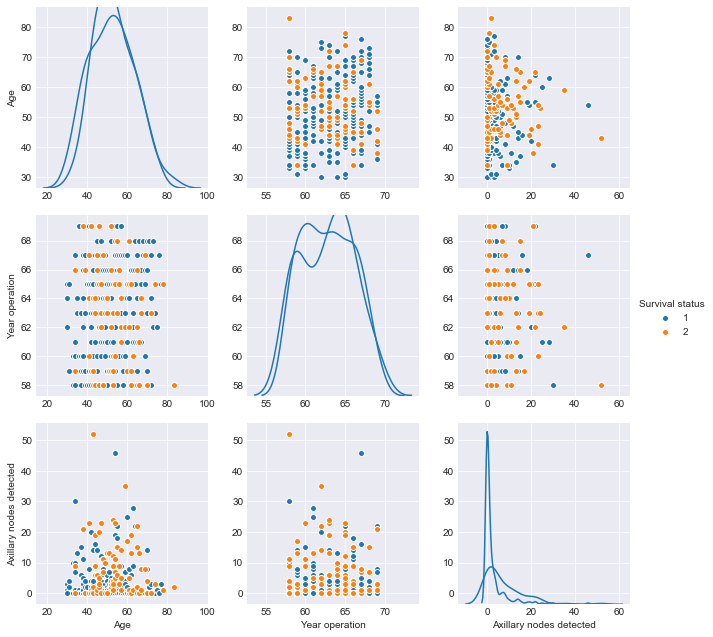

In [17]:
#plotting the dataset with Survival attribute
sns.pairplot(dataset, hue="Survival status", size=3, diag_kind="kde",\
             vars=['Age','Year operation','Axillary nodes detected'])
pl.show()

## **Observations**

 From the above pair plots:
* In the first three pair plots when we plotted using **Age, Year operation, Axillary nodes detected ** attributes, we find there is no good insights in those plots.
* But in the fourth pairplot we can see **Survival status and Age** attributes distribution seems to be like a normal distribution. so look at the distribution more vividly.

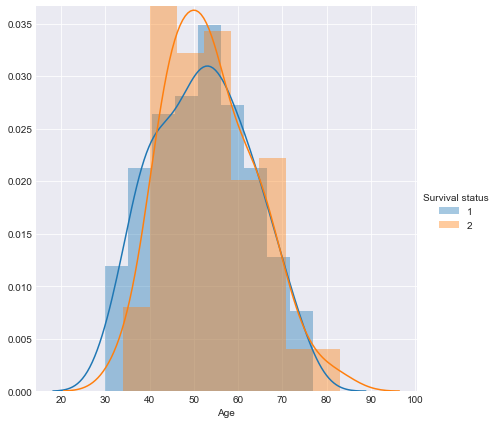

In [18]:
sns.FacetGrid(dataset, hue="Survival status", size=6).map(sns.distplot, "Age").add_legend()
pl.show()

C:\Users\Murali\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


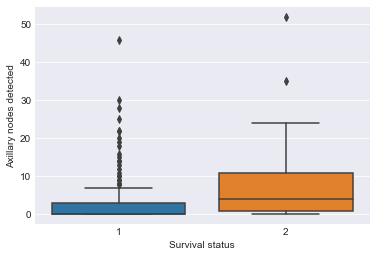

In [19]:
sns.boxplot(x='Survival status',y='Axillary nodes detected', data=dataset)
pl.show()

C:\Users\Murali\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\Murali\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


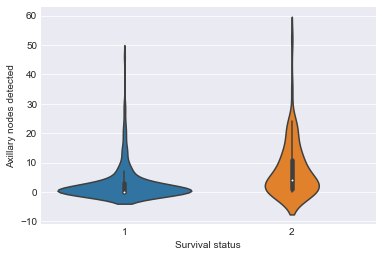

In [20]:
sns.violinplot(x='Survival status', y='Axillary nodes detected', data=dataset)
pl.show()

Since, the distributions looks normal for both *survived* and *not survived*, mean would be a right measure of data.

In [21]:
print("Mean age of patients survived:", round(np.mean(dataset[dataset['Survival status'] == 1]['Age'])))
print("Mean age of patients not survived:", round(np.mean(dataset[dataset['Survival status'] == 2]['Age'])))

Mean age of patients survived: 52
Mean age of patients not survived: 54


In [22]:
sur = dataset[dataset['Survival status'] == 1]
sur.describe()

,Age,Year operation,Axillary nodes detected,Survival status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [23]:
not_sur = dataset[dataset['Survival status'] == 2]
not_sur.describe()

,Age,Year operation,Axillary nodes detected,Survival status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


## **Observations**

* The people who are **not survived** tend to have more average number of **Axillary nodes detected** and more spread out the distribution than **survived**.
* ***Axillary nodes detected*** is the useful features to indentify the survival status. since, the both distributions are way different from each other.
* There Mean age of the patients **not survived** is **54** and **survived** is **52** years.
* There are more number of people around **1965** year of operation than people around **1958** in not survived class, represents a bimodal distribution.

# **Multivariate Analysis**


## **Parallel coordinates**

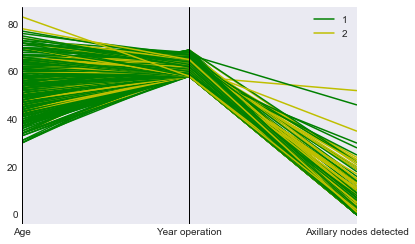

In [24]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(dataset, "Survival status",color=['g','y'])
pl.show()